In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [4]:
#Healthcare App Playstore User Reviews
healthCareDf = pd.read_csv('/content/sample_data/HealthCare_Customer_Reviews.csv')

print(healthCareDf.shape)


(342687, 5)


In [5]:
from sklearn.model_selection import train_test_split

trainDf, testDf = train_test_split(healthCareDf, test_size=0.3)

In [6]:
print(trainDf.shape)
print(testDf.shape)

(239880, 5)
(102807, 5)


In [7]:
trainDf.head()

,Healthcare App,Username,Content,Rating,Date
303119,TATA 1mg,A Google user,whooooo experience 🤩,5,21-12-2018 12:20
262690,TATA 1mg,A Google user,Nice app,4,17-11-2019 10:44
178148,TATA 1mg,Stanislaus Monterio,Quick delivery and good packaging,5,22-07-2022 03:21
236778,TATA 1mg,Arvind Kumar Sinha,Well,5,20-07-2020 15:34
36518,Practo,A Google user,Very easy access to doctors appointments and m...,5,12-04-2020 06:54


In [8]:
testDf.head()

,Healthcare App,Username,Content,Rating,Date
133844,Apollo 24|7,Ram Indi,Apollo 247 app is very nice appreciate and ver...,5,11-09-2020 08:43
205976,TATA 1mg,G S DHAR,"Prompt, courteous and trustworthy",5,04-09-2021 02:07
173192,TATA 1mg,Neha Veralkar,I wanted to order one liquid medine and it was...,1,23-09-2022 05:07
49779,Practo,A Google user,Worst and most irresponsible. ..plz don't inst...,1,20-05-2017 03:03
41334,Practo,A Google user,No low cost medicines available,1,14-05-2019 12:20


In [9]:
trainDf.isnull().any()

Healthcare App    False
Username          False
Content            True
Rating            False
Date              False
dtype: bool

In [10]:
testDf.isnull().any()

Healthcare App    False
Username          False
Content            True
Rating            False
Date              False
dtype: bool

In [11]:
trainDf.dropna(subset=['Content'], how='all', inplace=True)
trainDf.isnull().any()

Healthcare App    False
Username          False
Content           False
Rating            False
Date              False
dtype: bool

In [12]:
testDf.dropna(subset=['Content'], how='all', inplace=True)
trainDf['Content'] = trainDf['Content'].str.replace('\W', ' ', regex=True)
testDf.isnull().any()

Healthcare App    False
Username          False
Content           False
Rating            False
Date              False
dtype: bool

In [13]:
print(trainDf.shape)
print(testDf.shape)

(239726, 5)
(102740, 5)


In [14]:
trainDf["Rating"].unique()

array([5, 4, 1, 3, 2])

In [15]:
testDf["Rating"].unique()

array([5, 1, 2, 4, 3])

<Axes: >

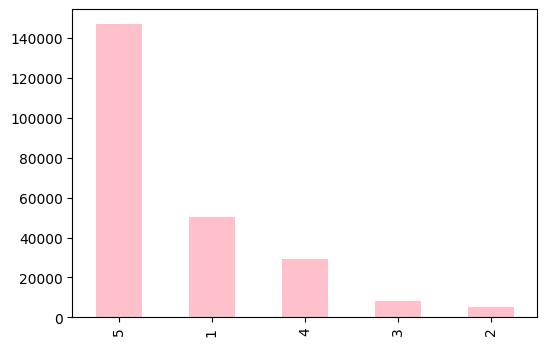

In [16]:
trainDf['Rating'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

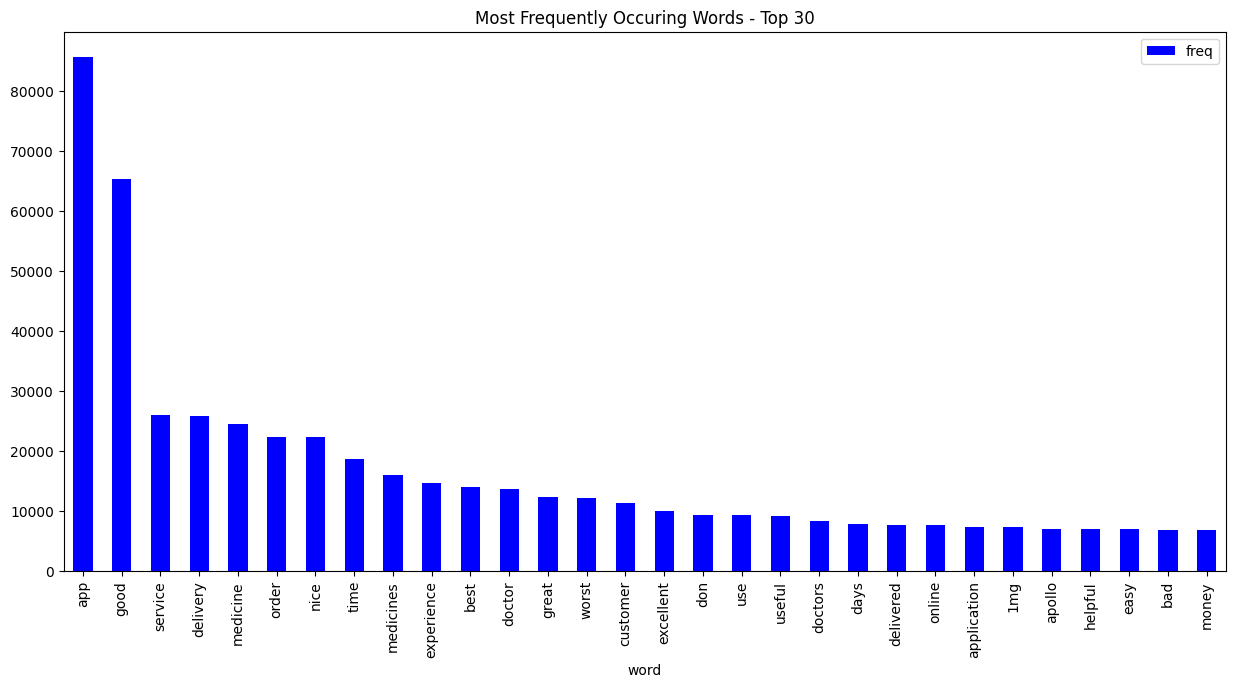

In [17]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(trainDf.Content)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

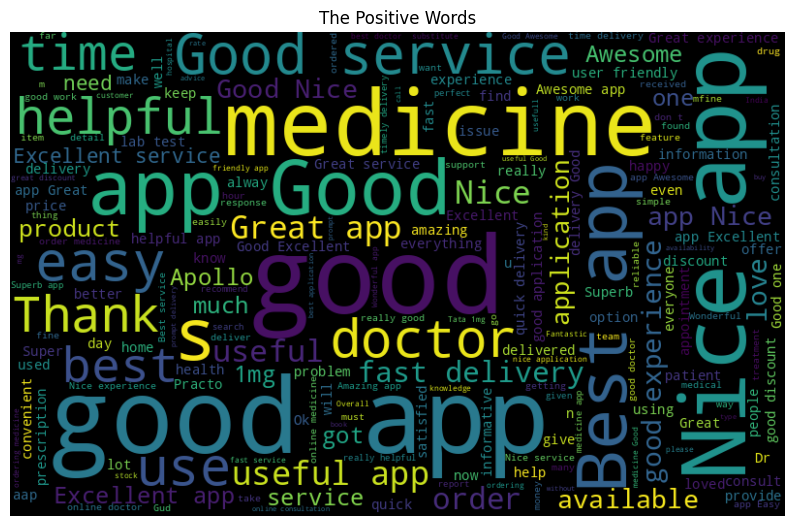

In [18]:
from wordcloud import WordCloud
positive_words =' '.join([text for text in trainDf['Content'][trainDf['Rating'] > 3]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

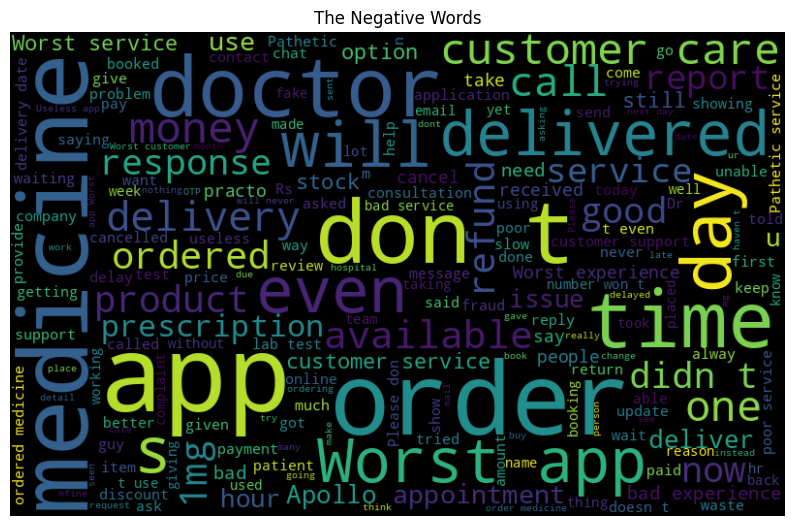

In [19]:
from wordcloud import WordCloud
negative_words =' '.join([text for text in trainDf['Content'][trainDf['Rating'] < 3]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [20]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()

stop = set(stopwords.words('english')) #set of stopwords

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)

{'she', 'his', 'you', 're', 'didn', 'm', 'me', 'against', 'hasn', 'out', 'same', "you've", 'into', 'few', 'more', 'do', 'those', "hasn't", 'above', 'and', 'are', 'if', 'for', 'very', 'should', 'needn', 'or', 'than', 'don', 'how', 'were', 'your', 'itself', 'being', 'y', 'now', "that'll", 'to', 'ain', "aren't", "mustn't", 'an', "she's", 'my', 'doing', 'he', 'there', 'won', 'further', "needn't", 'as', "won't", 'both', 'this', 'him', 'own', "you'll", 'our', 'no', 'am', 'between', 'until', 'mustn', 've', "didn't", 'some', 'just', 'when', 'down', 'yourselves', 'on', 'has', 'mightn', 'after', "don't", 'why', 'then', 'with', 'these', 'by', 'i', 'wasn', 'once', 'under', "you'd", 'ma', 'nor', 'o', "doesn't", 'through', 'of', 'isn', 'who', "mightn't", 'having', 'most', 'here', 'myself', 'can', 'other', 'off', 'hers', 'all', 'so', "it's", 'doesn', "you're", 'her', 'whom', 'that', 'll', 'd', 'while', 'below', 'shan', 'did', 'yourself', 't', 's', 'they', 'is', 'at', 'because', 'was', 'himself', 'in'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [21]:

final_string=[]

for sent in trainDf['Content'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):
                if(cleaned_words.lower() not in stop):
                    filtered_sentence.append(lemmatizer.lemmatize(cleaned_words.lower(),wordnet.VERB))
                else:
                    continue
            else:
                continue
    #print(filtered_sentence)
    final_string.append(filtered_sentence)

In [22]:
final_string[19]

['great', 'experience', 'understand', 'genuine', 'problem', 'feel']

In [23]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

print("love :", lemmatizer.lemmatize("used", wordnet.VERB))
print("loving :", lemmatizer.lemmatize("use", wordnet.VERB))
print("loved :", lemmatizer.lemmatize("using", pos=wordnet.VERB))

love : use
loving : use
loved : use


In [24]:
trainDf.head(30)

,Healthcare App,Username,Content,Rating,Date
303119,TATA 1mg,A Google user,whooooo experience,5,21-12-2018 12:20
262690,TATA 1mg,A Google user,Nice app,4,17-11-2019 10:44
178148,TATA 1mg,Stanislaus Monterio,Quick delivery and good packaging,5,22-07-2022 03:21
236778,TATA 1mg,Arvind Kumar Sinha,Well,5,20-07-2020 15:34
36518,Practo,A Google user,Very easy access to doctors appointments and m...,5,12-04-2020 06:54
216439,TATA 1mg,Hitesh Sosa,Hospital,4,13-05-2021 09:41
330099,TATA 1mg,A Google user,Superrrr,5,08-06-2016 17:07
232957,TATA 1mg,Vivek Mehta,Nice,5,12-09-2020 15:34
279047,TATA 1mg,A Google user,very good i got homeopathic english Ayurved...,5,27-06-2019 07:33
186987,TATA 1mg,Kiran Gulati,App is faster than other competitors,5,11-04-2022 16:38


In [32]:
# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            final_string,
            vector_size=20, # desired no. of features/independent variables
            min_count=2,
            workers= 5) # no.of cores

model_w2v.train(final_string, total_examples= len(trainDf['Content']), epochs=20)

(24447024, 32694300)

In [33]:
model_w2v.wv["bad"]

array([-0.66345006,  0.84539574, -0.08399326, -3.2710066 ,  2.5568707 ,
       -2.1399636 ,  2.6652513 ,  1.3654284 ,  2.2241254 , -1.3765455 ,
       -0.8805349 , -0.51070124,  0.11160512,  0.7529356 ,  4.329191  ,
       -1.7365512 ,  2.9404013 ,  1.2030783 ,  2.230643  ,  2.296989  ],
      dtype=float32)

In [34]:
model_w2v.wv.most_similar(positive = "bad")

[('horrible', 0.9026913642883301),
 ('worse', 0.8773192167282104),
 ('terrible', 0.8744306564331055),
 ('awful', 0.873220682144165),
 ('worst', 0.8684791922569275),
 ('poor', 0.8533113598823547),
 ('pathetic', 0.8125081658363342),
 ('disgust', 0.792506754398346),
 ('worest', 0.7924506664276123),
 ('wrost', 0.784865140914917)]

In [69]:
sent_vectors_train = []; # the avg-w2v for each sentence/review is stored in this train
for sent in final_string: # for each review/sentence
    sent_vec = np.zeros(20) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = model_w2v.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors_train.append(np.nan_to_num(sent_vec, posinf = 22222))

print (len(sent_vectors_train))
print (len(sent_vectors_train[0]))

<ipython-input-69-62f2dd02e38d>:12: RuntimeWarning: invalid value encountered in true_divide
  sent_vec /= cnt_words


239726
20


In [70]:
print (sent_vectors_train[2])

[-1.2724579   1.88204198 -0.97085448  0.90993416 -0.33266944  1.49121912
 -2.33053917  1.12057209  0.53358474 -1.71640082 -0.28090908 -1.42598704
 -0.06895944  2.71315741 -0.55122882 -1.73327763 -0.41878951  1.5465917
  1.6704978   1.15870523]


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()

In [ ]:
base_ln = [x for x in range(1, 40)]
base_ln

In [66]:
print(trainDf.shape)

(239726, 5)


In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, sent_vectors_train, trainDf.Rating, cv = 3)
    cv_scores.append(scores.mean())

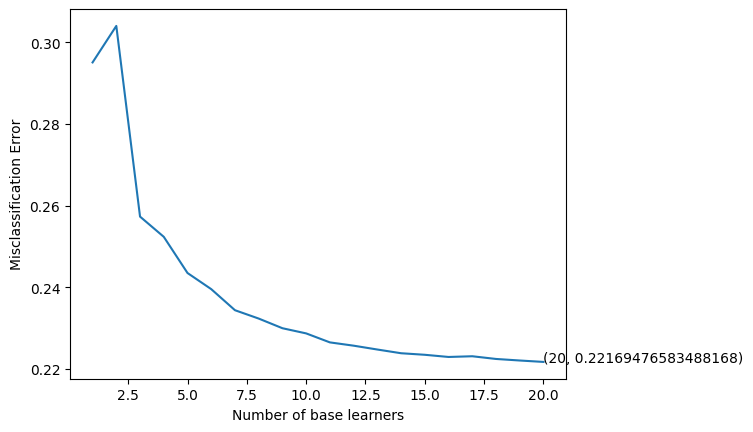

In [74]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]
optimal_learners = base_ln[error.index(min(error))]
plt.plot(base_ln, error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(sent_vectors_train, y_train)
clf.score(sent_vectors_test, y_test)